# CAPSTONE PROJECT -<span style="font-size: 38px; color: turquoise; font-weight: bold;">CREDIT CARD APPROVAL PREDICTION </span> BY <span style="font-size: 38px; color: teal; font-weight: bold;">PRATHMESH BHIMRAJ BHUKELE 

#### This new approach powered by machine learning ensures that loans are given to trustworthy individuals, minimizing the chance of financial losses for banks. It not only analyzes applicant data deeply but also streamlines processes, saving time and reducing costs. By automating tasks, it enhances efficiency, benefitting both banks and customers. This approach not only revolutionizes credit assessment but also gives a competitive edge by offering favorable terms to low-risk borrowers, making banking more reliable and efficient for everyone involved.

# <span style="font-size: 25px; color: maroon; font-weight: bold;">Questions </span>
<span style="font-size: medium; color: Maroon; font-weight: bold;">1. Why is your proposal important in today's world? How predicting a good client is worthy for a bank?<span>

<span style="font-size: medium; color: orange;">Predicting good clients in credit card loan approvals is like having a financial compass for a bank. It's crucial because it helps keep the financial ship steady by minimizing the risk of loans not being repaid and avoiding troublesome assets. This not only makes operations smoother but also ensures the bank plays by the rules and stays ahead of the competition, keeping customers happy and loyal. Accurate credit assessments act like a guide, helping the bank make smart decisions based on real data, contributing to fair access to financial services and even helping spot potential fraud early on. In simple terms, it's a key ingredient for the bank's success, keeping everything in balance.

<span style="font-size: medium; color: Maroon; font-weight: bold;">2. How is it going to Impact the banking sector?

<span style="font-size: medium; color: Orange;">Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low-income levels, or too many inquiries on an individual’s credit report. Manually analyzing these applications is error-prone and time-consuming. Fortunately, this task can be automated with the power of machine learning, and pretty much every commercial bank does so nowadays.

<span style="font-size: medium; color: Maroon; font-weight: bold;">3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India

<span style="font-size: medium; color: Orange;">The proposed method addresses & offers a faster, more accurate, and unbiased alternative to conventional approaches. Machine learning enables efficient handling of large datasets, ensuring consistent and precise decision-making. This approach enhances risk management and adapts to changing market conditions, ultimately improving the overall customer experience.


# <span style="font-size: 25px; color: maroon; font-weight: bold;">Data Analysis Approach </span>
<span style="font-size: 20px; color: turquoise;">Hypothesis:
1. We hypothesize that specific demographic factors such as age, gender, education level, and income exhibit patterns that correlate with credit card approval decisions.
2. Features like annual income, age, and employment duration are expected to be crucial in determining creditworthiness. Gender and marital status may also play a role. However, more detailed information on credit scores, previous credit history, and other financial indicators could enhance the analysis.
3. The presence of missing values in columns like education and occupation may impact the analysis, and addressing them through imputation or removal is necessary.

# <span style="font-size: 25px; color: maroon; font-weight: bold;">Machine Learning (ML) Approach
<span style="font-size: 20px; color: turquoise;">Hypothesis:
1. In the ML track, we hypothesize that machine learning models trained on the dataset will outperform traditional rule-based approaches in predicting credit card approval decisions.
2. Features such as annual income, age, and education level are anticipated to be significant predictors of credit card approval. Other factors like gender and employment duration may also contribute to the model's predictive power.
3. The Random Forest model, with its ability to capture complex relationships and handle non-linearities, is expected to outperform other models like logistic regression and decision trees in terms of accuracy and generalization.

# <span style="font-size: 25px; color: maroon; font-weight: bold;">Justification:
1. For model evaluation, I employed relevant cost functions such as accuracy, confusion matrix, and F1-score to assess predictive capability and minimize misclassifications.
2. Cross-validation techniques were implemented to ensure the robustness of our models, assessing their performance on unseen data and avoiding overfitting.
3. Feature importance analysis, using techniques like feature importance plots provided by tree-based models, was conducted to understand the impact of different features on predicting credit card approval

# <span style="font-size: 35px; color: maroon; font-weight: bold;">Data Understanding & Preparation</span>

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Loading Both the data sets and merging them based on column "Ind_ID"</span>

In [2]:
# Load the dataset
Credit_card = pd.read_csv('Credit_card.csv')
Credit_card_label = pd.read_csv('Credit_card_label.csv')

In [3]:
# Assuming 'Ind_ID' is the common column between the two tables
merged_data = pd.merge(Credit_card, Credit_card_label, left_on='Ind_ID', right_on='Ind_ID')

In [4]:
# creating a new table merged_data.csv 
merged_data.to_csv("merged_data.csv",index=False)

In [5]:
merged_data = pd.read_csv("merged_data.csv")

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Analysing Data</span>

In [6]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [7]:
merged_data.info()
merged_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

<span style="font-size: 18px; color: orange;">KEY POINTS
- The data consisted of 4 columns which were missing values GENDER , Annual_Income , Birthday_count , Type_Occupation.
- The Birthday_count & Type_Occupation was converted from Days to Year format.

In [8]:
# Display the DataFrame
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Changed the Days format to Year format.</span>

In [9]:
# Assuming you have a DataFrame named merged_data with columns 'Employed_days' and 'Birthday_count'

# Check if 'Employment_Year' column exists before creating it
if 'Employed_days' in merged_data.columns and 'Employment_Year' not in merged_data.columns:
    # Converting 'Employed_days' to years and rounding, then replacing the original column
    merged_data['Employed_days'] = round(abs(merged_data['Employed_days']) / 365, 0)
    merged_data.rename(columns={'Employed_days': 'Employment_Year'}, inplace=True)

# Check if 'Age' column exists before creating it
if 'Birthday_count' in merged_data.columns and 'Age' not in merged_data.columns:
    # Converting 'Birthday_count' to years, rounding, and handling negative values, then replacing the original column
    merged_data['Birthday_count'] = round(abs(merged_data['Birthday_count']) / 365, 0)
    merged_data.rename(columns={'Birthday_count': 'Age'}, inplace=True)

# Display the DataFrame
print(merged_data.head())


    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

    Age  Employment_Year  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0  51.0           1001.0         

In [10]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employment_Year,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2.0,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1


In [11]:
merged_data.to_csv("Year_Type_converted_2_CCB2.csv")

## <span style="font-size: 25px; color: skyblue; font-weight:bold ;">Capping the Outliers in the Employment_Year</span>

<span style="font-size: 18px; color: orange;">Applied Capping method to Employment_Year column by limiting extreme values.

In [12]:
# Assuming merged_data is your DataFrame
# Calculate the interquartile range (IQR) for Employment_Year
Q1 = merged_data['Employment_Year'].quantile(0.25)
Q3 = merged_data['Employment_Year'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers in the Employment_Year column
merged_data['Employment_Year'] = merged_data['Employment_Year'].clip(lower=None, upper=upper_bound)

# Display the capped data
print(merged_data.head())


    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

    Age  Employment_Year  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0  51.0             38.0         

In [13]:
merged_data.to_csv("Capped_values_3_CCB2.csv",index=False)

In [14]:
Year_Type_converted_2_CCB2 = pd.read_csv("Year_Type_converted_2_CCB2.csv")

In [15]:
Capped_values_3_CCB2 = pd.read_csv("Capped_values_3_CCB2.csv")

<span style="font-size: 18px; color: orange;">Using BoxPlot to see any potential outliers in the column and comparing the columns before capping and after.

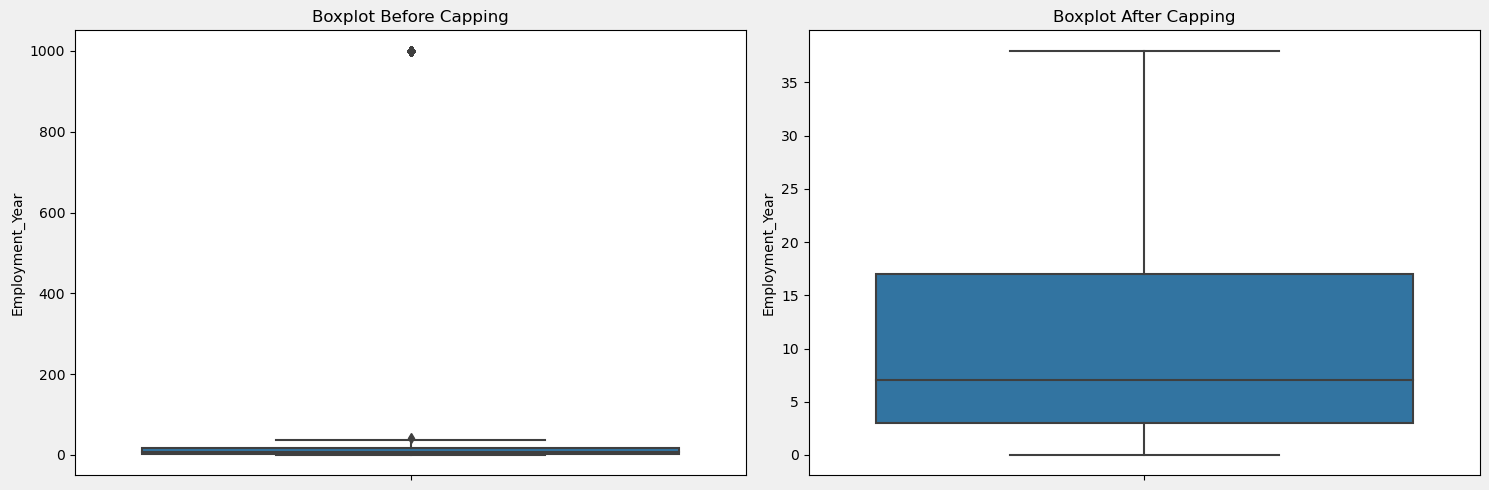

In [16]:
background_color = '#F0F0F0'  # Light gray background color
plt.figure(figsize=(15, 5), facecolor=background_color)  # Set the facecolor for the whole figure
plt.subplot(1, 2, 1)
sns.boxplot(y="Employment_Year", data=Year_Type_converted_2_CCB2)
plt.title("Boxplot Before Capping")

plt.subplot(1, 2, 2)
sns.boxplot(y="Employment_Year", data=Capped_values_3_CCB2)
plt.title("Boxplot After Capping")

plt.tight_layout()
plt.show()

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Dealing with Missing Values</span>

<span style="font-size: 18px; color: orange;">Looking for null values and dropping unnecessary columns</span>

In [17]:
Capped_values_3_CCB2.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employment_Year      0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Dealing with Missing Values (Numerical Data)</span>

<span style="font-size: 18px; color: orange;">We chose KNN imputation over MICE as our preferred method because the KNN imputer gives more accurate estimates using nearby values. It provides a detailed understanding of the missing data. In contrast, MICE uses conditional imputation models based on observed values from other variables, which we found less suitable for our dataset's variability and complexity.

In [18]:
from sklearn.impute import KNNImputer
# Specify the columns you want to impute
columns_to_impute = ['Annual_income','Age']

# Create a KNN imputer
knn_imputer = KNNImputer(n_neighbors=3)  # Adjust n_neighbors as needed

# Apply KNN imputation to the specified columns
Capped_values_3_CCB2[columns_to_impute] = knn_imputer.fit_transform(Capped_values_3_CCB2[columns_to_impute])

In [19]:
Capped_values_3_CCB2.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employment_Year,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,38.0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,NaN,2,1


In [20]:
Capped_values_3_CCB2.to_csv("Imputed_knn_4_CCB2.csv",index=False)

In [21]:
Imputed_knn_4_CCB2 = pd.read_csv("Imputed_knn_4_CCB2.csv")

In [22]:
Imputed_knn_4_CCB2.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                  0
Employment_Year      0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Dealing with Missing Values (Categorical Data)</span>

In [23]:
# Fill missing values in 'Type_Occupation' column where 'Type_Income' is not 'Pensioner'
Imputed_knn_4_CCB2.loc[Imputed_knn_4_CCB2['Type_Income'] != 'Pensioner', 'Type_Occupation'] = Imputed_knn_4_CCB2.loc[Imputed_knn_4_CCB2['Type_Income'] != 'Pensioner', 'Type_Occupation'].fillna('Unknown')

In [24]:
# Fill missing values in 'Type_Occupation' column where 'Type_Income' is 'Pensioner'
Imputed_knn_4_CCB2.loc[Imputed_knn_4_CCB2['Type_Income'] == 'Pensioner', 'Type_Occupation'] = Imputed_knn_4_CCB2.loc[Imputed_knn_4_CCB2['Type_Income'] == 'Pensioner', 'Type_Occupation'].fillna('Pensioner')

In [25]:
Imputed_knn_4_CCB2['GENDER'].fillna(Imputed_knn_4_CCB2['GENDER'].mode()[0], inplace=True)

In [26]:
Imputed_knn_4_CCB2.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Age                0
Employment_Year    0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

<span style="font-size: 18px; color: orange;">Now we have a cleaned data set with no null values.

In [27]:
Imputed_knn_4_CCB2.to_csv("Cleaned_data_5_CCB2.csv",index=False)

In [28]:
Cleaned_data_5_CCB2 = pd.read_csv("Cleaned_data_5_CCB2.csv")

<span style="font-size: 18px; color: orange;">Assiging proper names to columns.

In [29]:
# Replacing the existing column names with the new names

new_column_names = {
    'Ind_ID': 'Individual_ID',
    'GENDER': 'Gender',
    'Car_Owner': 'Car_Owner',
    'Propert_Owner': 'Property_Owner',
    'CHILDREN': 'Childrens',
    'Annual_income': 'Annual_Income',
    'Type_Income': 'Income_Type',
    'EDUCATION': 'Education_Level',
    'Marital_status': 'Marital_Status',
    'Housing_type': 'Housing_Type',
    'Age': 'Age',
    'Employment_Year': 'Employment_Duration',
    'Mobile_phone': 'Mobile_Phone',
    'Work_Phone': 'Work_Phone',
    'Phone': 'Phone',
    'EMAIL_ID': 'Email_Address',
    'Type_Occupation': 'Occupation_Type',
    'Family_Members': 'Family_Members',
    'label': 'Target_Label'
}

Cleaned_data_5_CCB2 = Cleaned_data_5_CCB2.rename(columns=new_column_names)


In [30]:
Cleaned_data_5_CCB2.to_csv("Cleaned_data_5_B_CCB2.csv",index=False)

In [31]:
Cleaned_data_5_B_CCB2 = pd.read_csv("Cleaned_data_5_B_CCB2.csv")

In [32]:
Cleaned_data_5_B_CCB2.head()

,Individual_ID,Gender,Car_Owner,Property_Owner,Childrens,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Age,Employment_Duration,Mobile_Phone,Work_Phone,Phone,Email_Address,Occupation_Type,Family_Members,Target_Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,38.0,1,0,0,0,Pensioner,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Unknown,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Unknown,2,1
3,5009749,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Unknown,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Unknown,2,1


# <span style="font-size: 35px; color: maroon; font-weight: bold;">EDA</span>

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">UNIVARIATE ANALYSIS

### <span style="font-size: 25px; color: skyblue; font-weight: bold;">1. Showing Distribution of values for each numerical column.

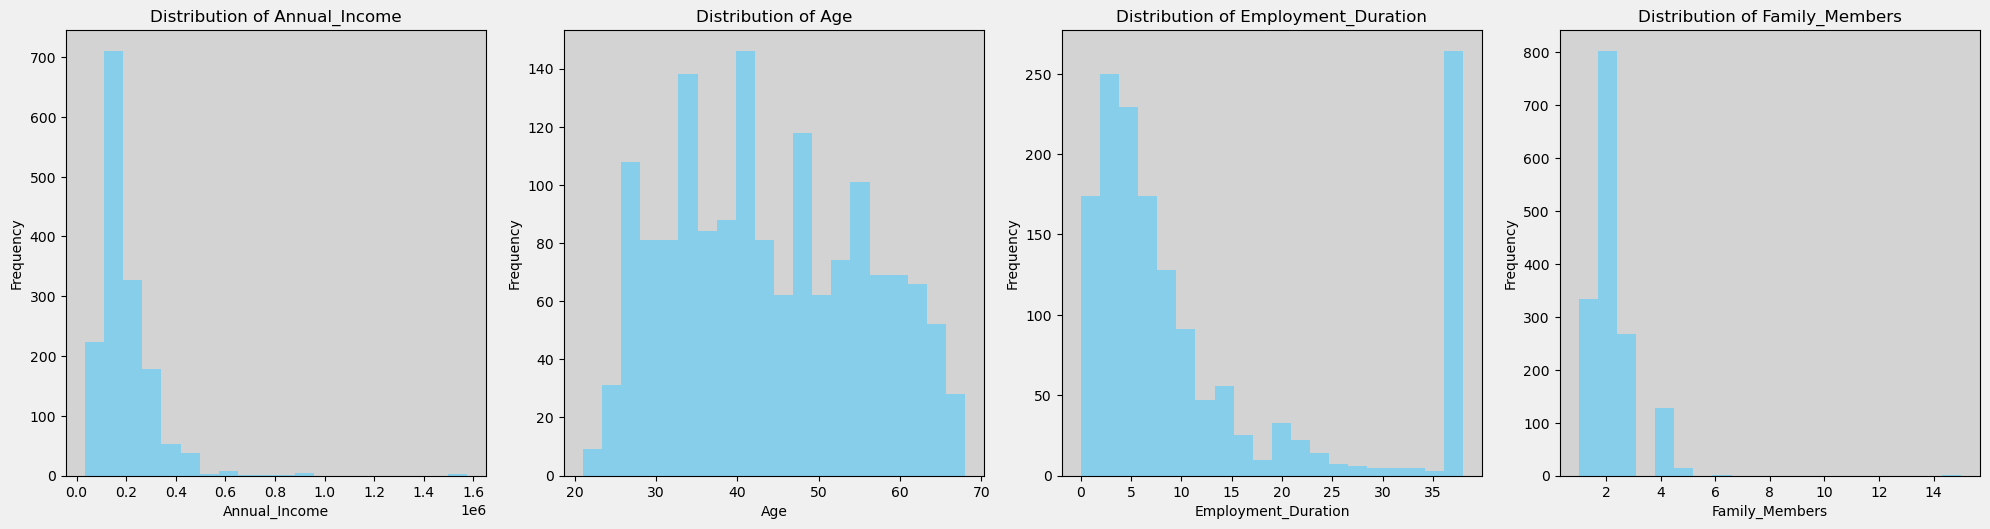

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive Statistics
numerical_columns = ['Annual_Income', 'Age', 'Employment_Duration', 'Family_Members']
categorical_columns = ['Gender', 'Car_Owner', 'Property_Owner', 'Income_Type', 'Education_Level', 
                        'Marital_Status', 'Housing_Type', 'Mobile_Phone', 'Work_Phone', 
                        'Phone', 'Occupation_Type', 'Target_Label']

# Basic Summary Statistics
summary_statistics = Cleaned_data_5_CCB2.describe()

# Subplot layout for numerical columns
rows, cols = 2, 4  # 2 rows and 4 columns
fig, axes = plt.subplots(rows, cols, figsize=(20, 10), facecolor='#F0F0F0')  # Set background color

# Data Distribution - Histograms for numerical columns
for i, col in enumerate(numerical_columns):
    ax = axes[i // cols, i % cols]
    ax.set_facecolor('lightgrey')  # Set light grey background color for each subplot
    Cleaned_data_5_CCB2[col].hist(bins=20, ax=ax, color='skyblue')  # Set histogram color
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(False)  # Turn off grid lines

# Remove the blank subplots for numerical columns
for i in range(len(numerical_columns), rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### <span style="font-size: 25px; color: skyblue; font-weight: bold;">2. Box plot represents the distribution of annual income for different Income_Types Column

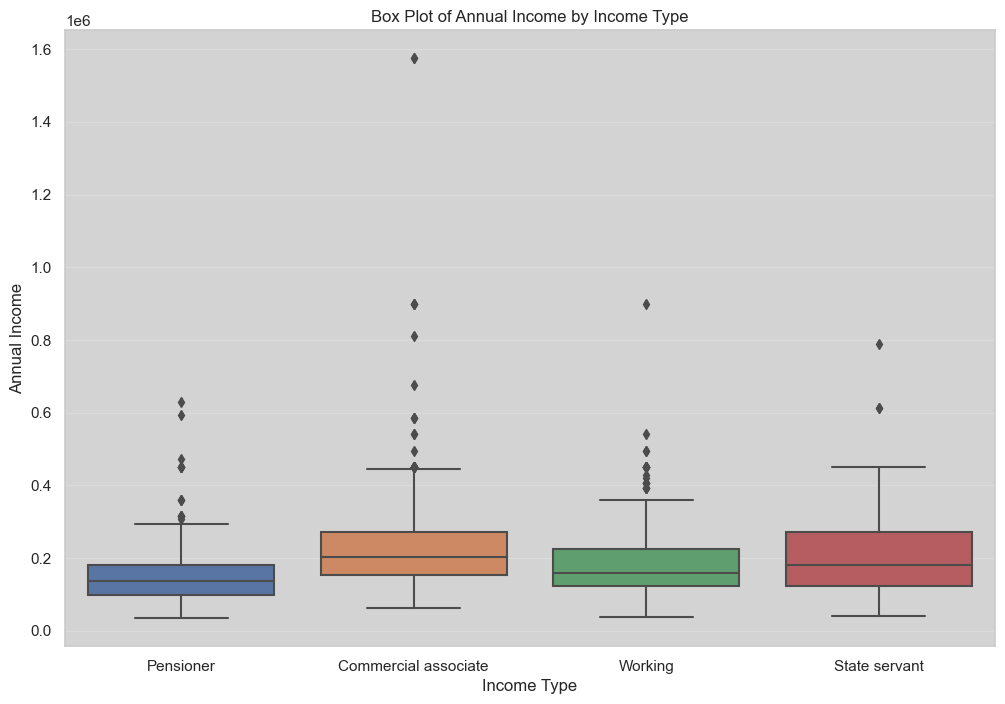

In [34]:
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(12, 8))

# Setting the background color
background_color = 'lightgray'
plt.gca().set_facecolor(background_color)
plt.grid(color='white', linestyle='-', linewidth=1, alpha=0.2)

sns.boxplot(x='Income_Type', y='Annual_Income', data=Cleaned_data_5_CCB2)

plt.title('Box Plot of Annual Income by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Annual Income')

plt.show()


## <span style="font-size: 25px; color: skyblue; font-weight: bold;">3. Pie charts to visually represent the distribution of categorical variables.

C:\Users\Prathmesh\AppData\Local\Temp\ipykernel_16456\3756668662.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


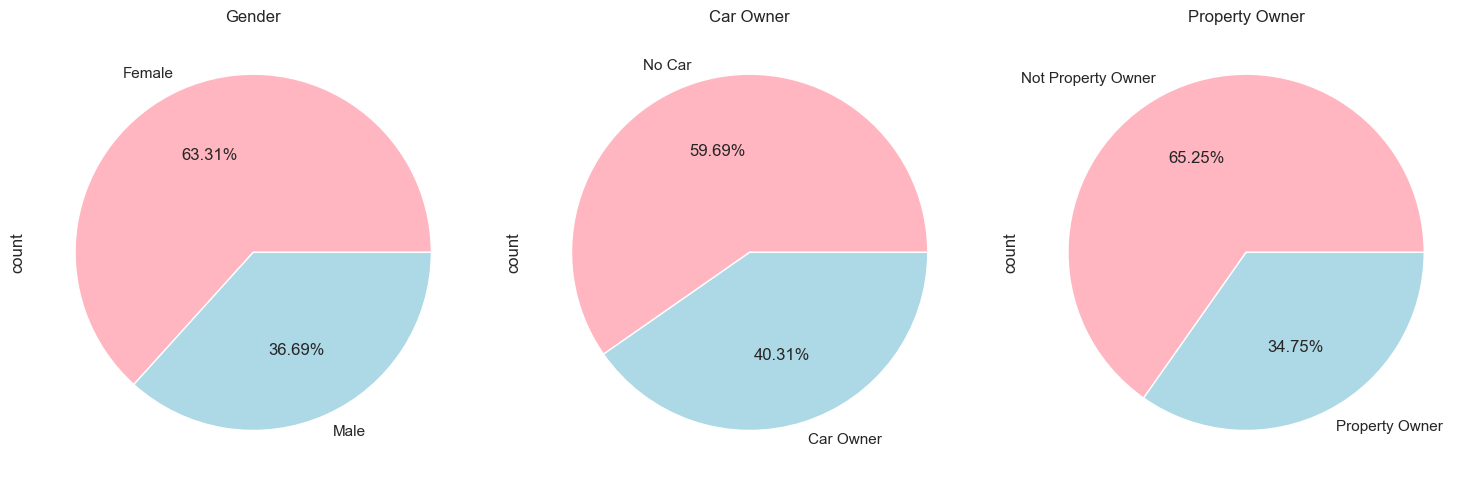

In [35]:
# Define background color
background_color = 'lightgray'  # Light gray background color

# Applying value_counts() separately to each column
value_counts_gender = Cleaned_data_5_CCB2['Gender'].value_counts()
value_counts_car_owner = Cleaned_data_5_CCB2['Car_Owner'].value_counts()
value_counts_property_owner = Cleaned_data_5_CCB2['Property_Owner'].value_counts()

# Plotting pie chart for each column with light blue and pink colors
plt.figure(figsize=(15, 5))

# Set the background color
plt.gca().set_facecolor(background_color)

# Define light blue and pink colors for pie chart slices
colors = ['#FFB6C1','#ADD8E6']

plt.subplot(1, 3, 1)
value_counts_gender.plot(kind='pie', autopct='%.2f%%', colors=colors, labels=['Female', 'Male'])
plt.title('Gender')

plt.subplot(1, 3, 2)
value_counts_car_owner.plot(kind='pie', autopct='%.2f%%', colors=colors, labels=['No Car', 'Car Owner'])
plt.title('Car Owner')

plt.subplot(1, 3, 3)
value_counts_property_owner.plot(kind='pie', autopct='%.2f%%', colors=colors, labels=['Not Property Owner', 'Property Owner'])
plt.title('Property Owner')

plt.tight_layout()
plt.show()

<span style="font-size: medium; color: orange;">The above three pie charts represents the distribution of gender, car ownership, and property ownership in the DataFrame.
1. The pie chart for 'Gender' indicates a higher percentage of females compared to males in the dataset.
2. Approximately 40.31% of individuals in the dataset own a car, as shown in the 'Car Owner' pie chart.
3. The 'Property Owner' pie chart reveals that around 34.75% of individuals own property in the dataset.

-------------------------------------------------------------------------------------------------------

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">BIVARIATE ANALYSIS

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">1. Visualizing the target variable and looking at how many approved and declined applications are there in our dataset.

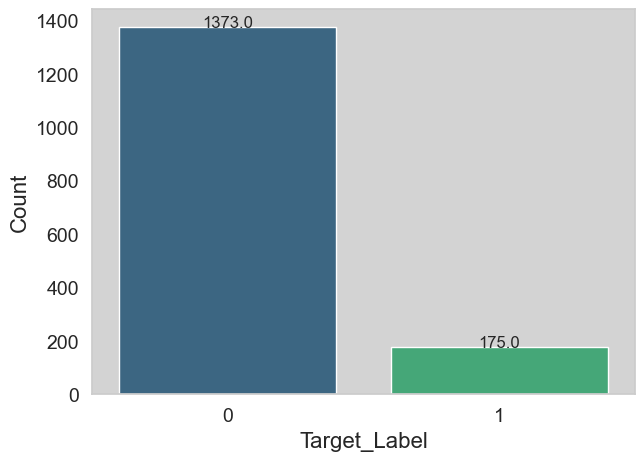

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
# Set light gray background color
ax.set_facecolor('lightgray')
# Create a count plot
sns.countplot(data=Cleaned_data_5_B_CCB2, x='Target_Label', edgecolor="white", palette="viridis")
# Calculate the total count
total = Cleaned_data_5_B_CCB2['Target_Label'].value_counts().sum()

# Display count labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height}', ha="center", fontsize=12)

# Remove grids
ax.grid(False)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Target_Label', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()


<span style="font-size: 18px; color: orange;">"In the provided countplot, the graph illustrates the distribution of 'Target_Label' in the dataset. Out of the total instances, only 175 values are marked as rejected (Target_Label = 1), while the majority, 1373 values, are marked as approved (Target_Label = 0)."

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Correlation Analysis - Heatmap

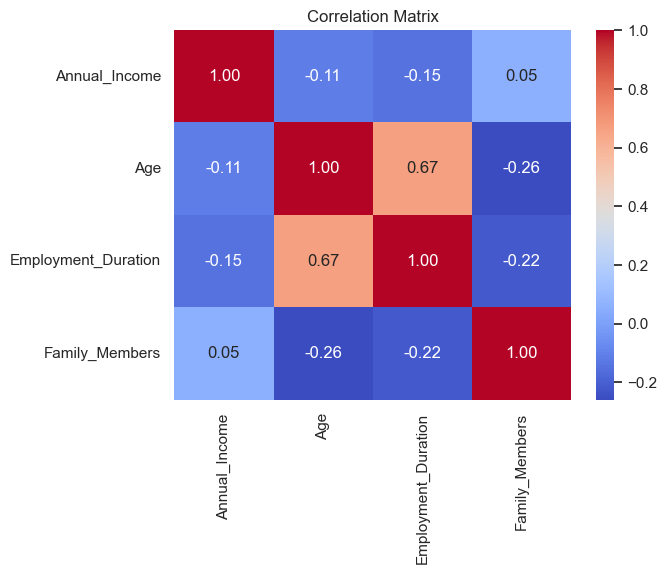

In [37]:
# Correlation Analysis - Heatmap
correlation_matrix = Cleaned_data_5_CCB2[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [38]:
Cleaned_data_5_CCB2["Income_Type"].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">4. Box plot represents the distribution of annual income for different income types

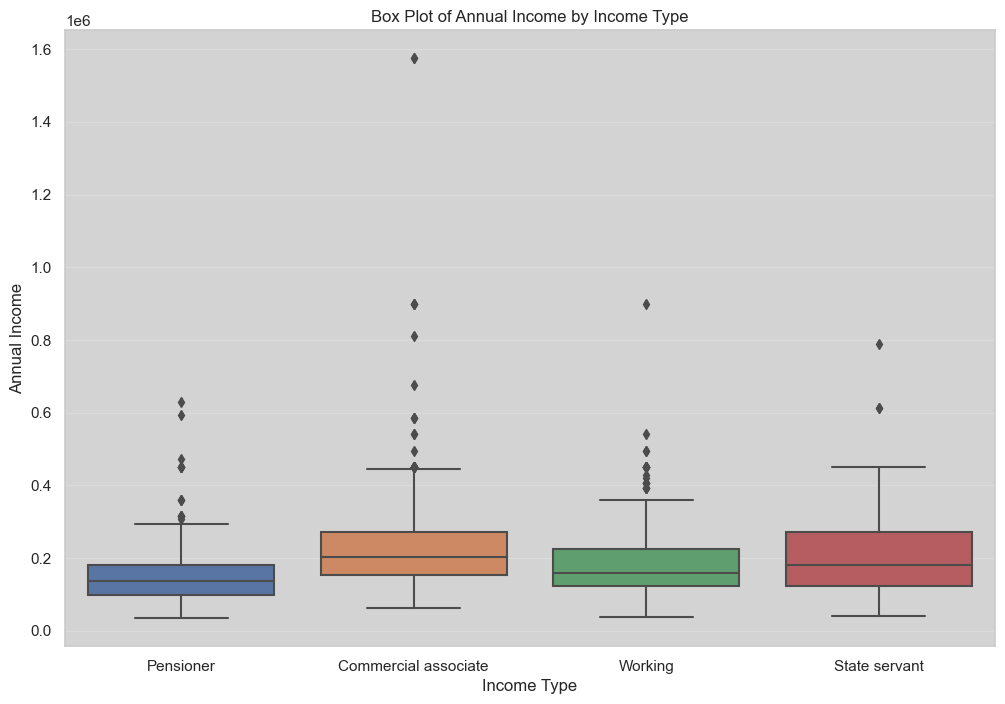

In [39]:
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(12, 8))

# Setting the background color
background_color = 'lightgray'
plt.gca().set_facecolor(background_color)
plt.grid(color='white', linestyle='-', linewidth=1, alpha=0.2)

sns.boxplot(x='Income_Type', y='Annual_Income', data=Cleaned_data_5_CCB2)

plt.title('Box Plot of Annual Income by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Annual Income')

plt.show()


# <span style="font-size: 35px; color: maroon; font-weight: bold;">Ordinal Encoding</span>

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Looking for all values and what object/values does it contains.

In [40]:
# Unique values for Occupation_Type
print("Unique values for Occupation_Type:", Cleaned_data_5_B_CCB2['Occupation_Type'].unique(), "\n")
# Unique values for Car_Owner
print("Unique values for Car_Owner:", Cleaned_data_5_B_CCB2['Car_Owner'].unique(), "\n")
# Unique values for Property_Owner
print("Unique values for Property_Owner:", Cleaned_data_5_B_CCB2['Property_Owner'].unique(), "\n")
# Unique values for Housing_Type
print("Unique values for Housing_Type:", Cleaned_data_5_B_CCB2['Housing_Type'].unique(), "\n")
# Unique values for Education_Level
print("Unique values for Education_Level:", Cleaned_data_5_B_CCB2['Education_Level'].unique(), "\n")
# Unique values for Income_Type
print("Unique values for Income_Type:", Cleaned_data_5_B_CCB2['Income_Type'].unique(), "\n")
# Unique values for Gender
print("Unique values for Gender:", Cleaned_data_5_B_CCB2['Gender'].unique(), "\n")
# Unique values for Marital_Status
print("Unique values for Marital_Status:", Cleaned_data_5_B_CCB2['Marital_Status'].unique(), "\n")

Unique values for Occupation_Type: ['Pensioner' 'Unknown' 'Core staff' 'Cooking staff' 'Laborers'
 'Sales staff' 'Accountants' 'High skill tech staff' 'Managers'
 'Cleaning staff' 'Drivers' 'Low-skill Laborers' 'IT staff'
 'Waiters/barmen staff' 'Security staff' 'Medicine staff'
 'Private service staff' 'HR staff' 'Secretaries' 'Realty agents'] 

Unique values for Car_Owner: ['Y' 'N'] 

Unique values for Property_Owner: ['Y' 'N'] 

Unique values for Housing_Type: ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment'] 

Unique values for Education_Level: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree'] 

Unique values for Income_Type: ['Pensioner' 'Commercial associate' 'Working' 'State servant'] 

Unique values for Gender: ['M' 'F'] 

Unique values for Marital_Status: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow'] 



## <span style="font-size: 25px; color: skyblue; font-weight: bold;">LABEL ENCODING

<span style="font-size: 18px; color: orange;">The code conducts Label Encoding DataFrame columns,replacing categorical values with numerical counterparts using predefined dictionaries,preparing the data for machine learning models.

In [41]:
# List of columns to perform label encoding on
columns_to_encode = ['Occupation_Type', 'Car_Owner', 'Income_Type', 'Housing_Type', 'Education_Level', 'Gender', 'Marital_Status', 'Property_Owner']

# Define mapping dictionaries for each column
occupation_type_mapping = {'Unknown': 0, 'Low-skill Laborers': 1, 'Cleaning staff': 2, 'Cooking staff': 3, 'Drivers': 4,
                           'Security staff': 5, 'Waiters/barmen staff': 6, 'Laborers': 7, 'Private service staff': 8,
                           'Realty agents': 9, 'Sales staff': 10, 'IT staff': 11, 'HR staff': 12, 'Accountants': 13,
                           'Medicine staff': 14, 'High skill tech staff': 15, 'Core staff': 16,'Secretaries': 17,'Managers': 18,
                           'Pensioner': 19}

car_owner_mapping = {'N': 0, 'Y': 1}

income_type_mapping = {'Pensioner': 0, 'State servant': 1, 'Working': 2, 'Commercial associate': 3}

housing_type_mapping = {'With parents': 0, 'Rented apartment': 1, 'Municipal apartment': 2, 'Co-op apartment': 3,
                        'Office apartment': 4, 'House / apartment': 5}

education_mapping = {'Lower secondary': 0, 'Secondary / secondary special': 1, 'Incomplete higher': 2,
                     'Higher education': 3, 'Academic degree': 4}

gender_mapping = {'F': 0, 'M': 1}

marital_status_mapping = {'Single / not married': 0, 'Married': 1, 'Civil marriage': 2, 'Separated': 3, 'Widow': 4}

property_owner_mapping = {'N': 0, 'Y': 1}

# Map the values using the defined dictionaries
Cleaned_data_5_B_CCB2[columns_to_encode[0]] = Cleaned_data_5_B_CCB2[columns_to_encode[0]].map(occupation_type_mapping)
Cleaned_data_5_B_CCB2[columns_to_encode[1]] = Cleaned_data_5_B_CCB2[columns_to_encode[1]].map(car_owner_mapping)
Cleaned_data_5_B_CCB2[columns_to_encode[2]] = Cleaned_data_5_B_CCB2[columns_to_encode[2]].map(income_type_mapping)
Cleaned_data_5_B_CCB2[columns_to_encode[3]] = Cleaned_data_5_B_CCB2[columns_to_encode[3]].map(housing_type_mapping)
Cleaned_data_5_B_CCB2[columns_to_encode[4]] = Cleaned_data_5_B_CCB2[columns_to_encode[4]].map(education_mapping)
Cleaned_data_5_B_CCB2[columns_to_encode[5]] = Cleaned_data_5_B_CCB2[columns_to_encode[5]].map(gender_mapping)
Cleaned_data_5_B_CCB2[columns_to_encode[6]] = Cleaned_data_5_B_CCB2[columns_to_encode[6]].map(marital_status_mapping)
Cleaned_data_5_B_CCB2[columns_to_encode[7]] = Cleaned_data_5_B_CCB2[columns_to_encode[7]].map(property_owner_mapping)

# Display the updated DataFrame
print(Cleaned_data_5_B_CCB2.head())

   Individual_ID  Gender  Car_Owner  Property_Owner  Childrens  Annual_Income  \
0        5008827       1          1               1          0       180000.0   
1        5009744       0          1               0          0       315000.0   
2        5009746       0          1               0          0       315000.0   
3        5009749       0          1               0          0       315000.0   
4        5009752       0          1               0          0       315000.0   

   Income_Type  Education_Level  Marital_Status  Housing_Type   Age  \
0            0                3               1             5  51.0   
1            3                3               1             5  37.0   
2            3                3               1             5  37.0   
3            3                3               1             5  37.0   
4            3                3               1             5  37.0   

   Employment_Duration  Mobile_Phone  Work_Phone  Phone  Email_Address  \
0           

In [42]:
Cleaned_data_5_B_CCB2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Individual_ID        1548 non-null   int64  
 1   Gender               1548 non-null   int64  
 2   Car_Owner            1548 non-null   int64  
 3   Property_Owner       1548 non-null   int64  
 4   Childrens            1548 non-null   int64  
 5   Annual_Income        1548 non-null   float64
 6   Income_Type          1548 non-null   int64  
 7   Education_Level      1548 non-null   int64  
 8   Marital_Status       1548 non-null   int64  
 9   Housing_Type         1548 non-null   int64  
 10  Age                  1548 non-null   float64
 11  Employment_Duration  1548 non-null   float64
 12  Mobile_Phone         1548 non-null   int64  
 13  Work_Phone           1548 non-null   int64  
 14  Phone                1548 non-null   int64  
 15  Email_Address        1548 non-null   i

In [43]:
Cleaned_data_5_B_CCB2.to_csv("Ordinal_Converted_6_CCB2.csv",index=False)

In [44]:
Ordinal_Converted_6_CCB2 = pd.read_csv("Ordinal_Converted_6_CCB2.csv")

In [45]:
Ordinal_Converted_6_CCB2.head()

,Individual_ID,Gender,Car_Owner,Property_Owner,Childrens,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Age,Employment_Duration,Mobile_Phone,Work_Phone,Phone,Email_Address,Occupation_Type,Family_Members,Target_Label
0,5008827,1,1,1,0,180000.0,0,3,1,5,51.0,38.0,1,0,0,0,19,2,1
1,5009744,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1
2,5009746,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1
3,5009749,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1
4,5009752,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1


In [46]:
Ordinal_Converted_6_CCB2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Individual_ID        1548 non-null   int64  
 1   Gender               1548 non-null   int64  
 2   Car_Owner            1548 non-null   int64  
 3   Property_Owner       1548 non-null   int64  
 4   Childrens            1548 non-null   int64  
 5   Annual_Income        1548 non-null   float64
 6   Income_Type          1548 non-null   int64  
 7   Education_Level      1548 non-null   int64  
 8   Marital_Status       1548 non-null   int64  
 9   Housing_Type         1548 non-null   int64  
 10  Age                  1548 non-null   float64
 11  Employment_Duration  1548 non-null   float64
 12  Mobile_Phone         1548 non-null   int64  
 13  Work_Phone           1548 non-null   int64  
 14  Phone                1548 non-null   int64  
 15  Email_Address        1548 non-null   i

In [47]:
Ordinal_Converted_6_CCB2.isnull().sum()

Individual_ID          0
Gender                 0
Car_Owner              0
Property_Owner         0
Childrens              0
Annual_Income          0
Income_Type            0
Education_Level        0
Marital_Status         0
Housing_Type           0
Age                    0
Employment_Duration    0
Mobile_Phone           0
Work_Phone             0
Phone                  0
Email_Address          0
Occupation_Type        0
Family_Members         0
Target_Label           0
dtype: int64

# <span style="font-size: 35px; color: maroon; font-weight: bold;">Feature Selection

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Further we will be using the "Ordinal_Converted_6_CCB2.csv" Dataset for prediction</span>

In [48]:
Ordinal_Converted_6_CCB2 = pd.read_csv("Ordinal_Converted_6_CCB2.csv")

In [49]:
df4 = pd.read_csv("Ordinal_Converted_6_CCB2.csv")

In [50]:
df4.isnull().sum()

Individual_ID          0
Gender                 0
Car_Owner              0
Property_Owner         0
Childrens              0
Annual_Income          0
Income_Type            0
Education_Level        0
Marital_Status         0
Housing_Type           0
Age                    0
Employment_Duration    0
Mobile_Phone           0
Work_Phone             0
Phone                  0
Email_Address          0
Occupation_Type        0
Family_Members         0
Target_Label           0
dtype: int64

In [51]:
df4.head()

,Individual_ID,Gender,Car_Owner,Property_Owner,Childrens,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Age,Employment_Duration,Mobile_Phone,Work_Phone,Phone,Email_Address,Occupation_Type,Family_Members,Target_Label
0,5008827,1,1,1,0,180000.0,0,3,1,5,51.0,38.0,1,0,0,0,19,2,1
1,5009744,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1
2,5009746,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1
3,5009749,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1
4,5009752,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1


In [52]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Individual_ID        1548 non-null   int64  
 1   Gender               1548 non-null   int64  
 2   Car_Owner            1548 non-null   int64  
 3   Property_Owner       1548 non-null   int64  
 4   Childrens            1548 non-null   int64  
 5   Annual_Income        1548 non-null   float64
 6   Income_Type          1548 non-null   int64  
 7   Education_Level      1548 non-null   int64  
 8   Marital_Status       1548 non-null   int64  
 9   Housing_Type         1548 non-null   int64  
 10  Age                  1548 non-null   float64
 11  Employment_Duration  1548 non-null   float64
 12  Mobile_Phone         1548 non-null   int64  
 13  Work_Phone           1548 non-null   int64  
 14  Phone                1548 non-null   int64  
 15  Email_Address        1548 non-null   i

<Axes: >

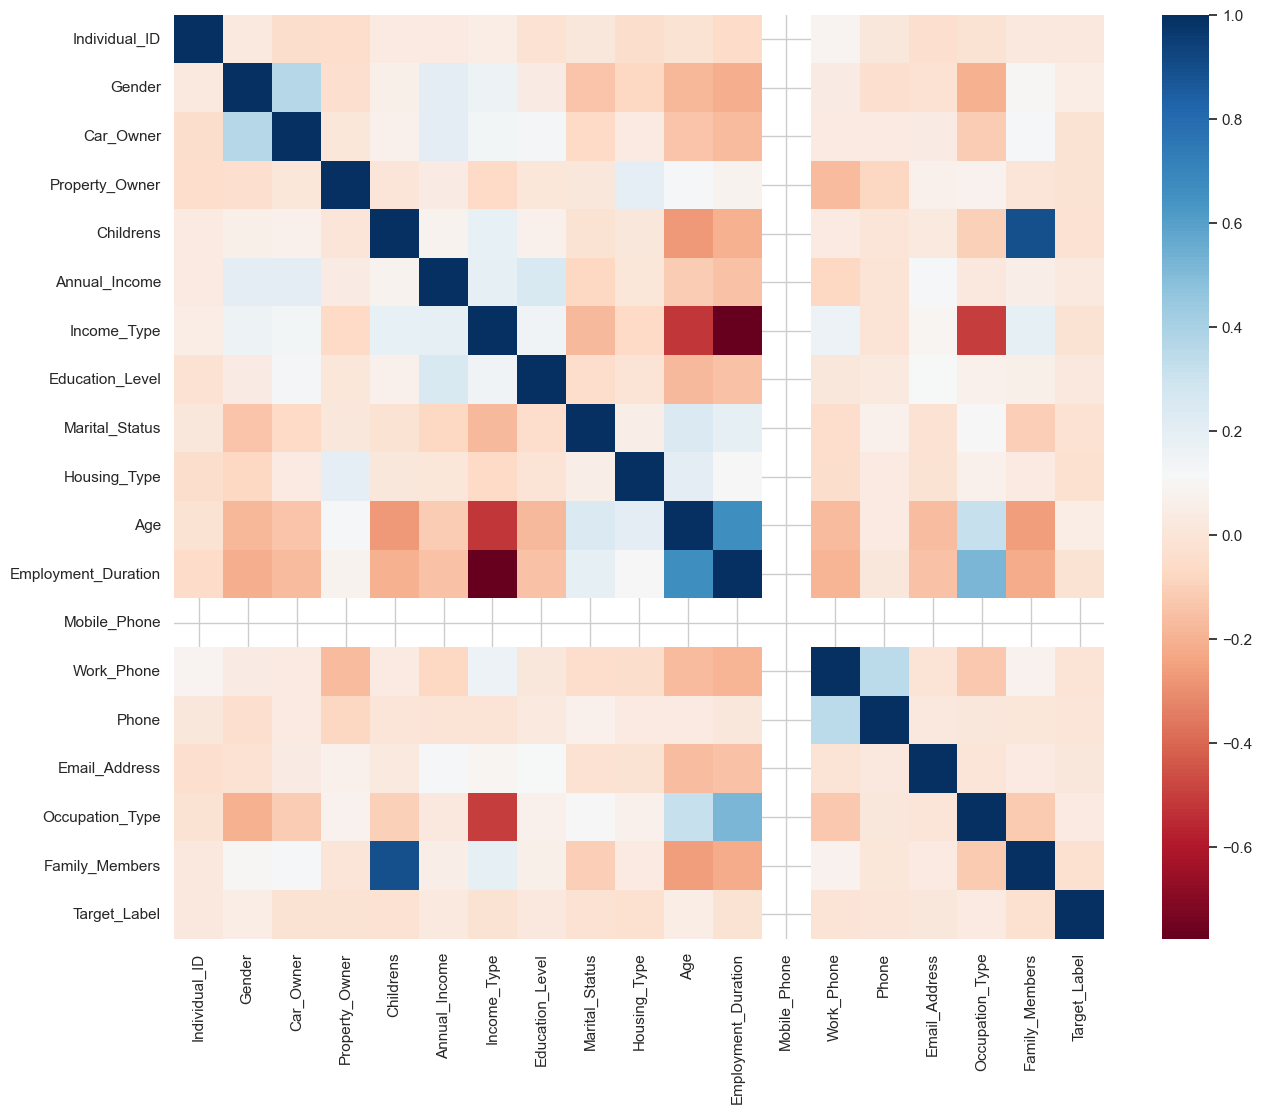

In [53]:
plt.figure(figsize=(15,12))
sns.heatmap(df4.corr(), annot=False, cmap = "RdBu")

# <span style="font-size: 35px; color: maroon; font-weight: bold;">Input and Output Data

In [54]:
df4.head()

,Individual_ID,Gender,Car_Owner,Property_Owner,Childrens,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Age,Employment_Duration,Mobile_Phone,Work_Phone,Phone,Email_Address,Occupation_Type,Family_Members,Target_Label
0,5008827,1,1,1,0,180000.0,0,3,1,5,51.0,38.0,1,0,0,0,19,2,1
1,5009744,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1
2,5009746,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1
3,5009749,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1
4,5009752,0,1,0,0,315000.0,3,3,1,5,37.0,2.0,1,1,1,0,0,2,1


In [55]:
X = df4.drop(columns=['Target_Label','Individual_ID'] ,axis = 1)
y = df4['Target_Label']

In [56]:
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(X))


In [57]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.0,1.0,0.0,0.094891,0.0,0.75,0.25,1.0,0.638298,1.000000,0.0,0.0,0.0,0.0,1.0,0.071429
1,0.0,1.0,0.0,0.0,0.182482,1.0,0.75,0.25,1.0,0.340426,0.052632,0.0,1.0,1.0,0.0,0.0,0.071429
2,0.0,1.0,0.0,0.0,0.182482,1.0,0.75,0.25,1.0,0.340426,0.052632,0.0,1.0,1.0,0.0,0.0,0.071429
3,0.0,1.0,0.0,0.0,0.182482,1.0,0.75,0.25,1.0,0.340426,0.052632,0.0,1.0,1.0,0.0,0.0,0.071429
4,0.0,1.0,0.0,0.0,0.182482,1.0,0.75,0.25,1.0,0.340426,0.052632,0.0,1.0,1.0,0.0,0.0,0.071429


# <span style="font-size: 35px; color: maroon; font-weight: bold;">Feature Selection with Extra Tree Classifier - Most important Features

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [59]:
df4.columns

Index(['Individual_ID', 'Gender', 'Car_Owner', 'Property_Owner', 'Childrens',
       'Annual_Income', 'Income_Type', 'Education_Level', 'Marital_Status',
       'Housing_Type', 'Age', 'Employment_Duration', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Address', 'Occupation_Type',
       'Family_Members', 'Target_Label'],
      dtype='object')

In [60]:
cols=[ 'Gender', 'Car_Owner', 'Property_Owner', 'Childrens',
       'Annual_Income', 'Income_Type', 'Education_Level', 'Marital_Status',
       'Housing_Type', 'Age', 'Employment_Duration', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Address', 'Occupation_Type',
       'Family_Members']

feature_imp = pd.Series(model.feature_importances_, index=cols)

feature_imp

Gender                 0.028972
Car_Owner              0.036141
Property_Owner         0.038661
Childrens              0.038916
Annual_Income          0.170528
Income_Type            0.051202
Education_Level        0.053083
Marital_Status         0.056411
Housing_Type           0.035455
Age                    0.155475
Employment_Duration    0.100385
Mobile_Phone           0.000000
Work_Phone             0.033044
Phone                  0.034562
Email_Address          0.024804
Occupation_Type        0.083069
Family_Members         0.059290
dtype: float64

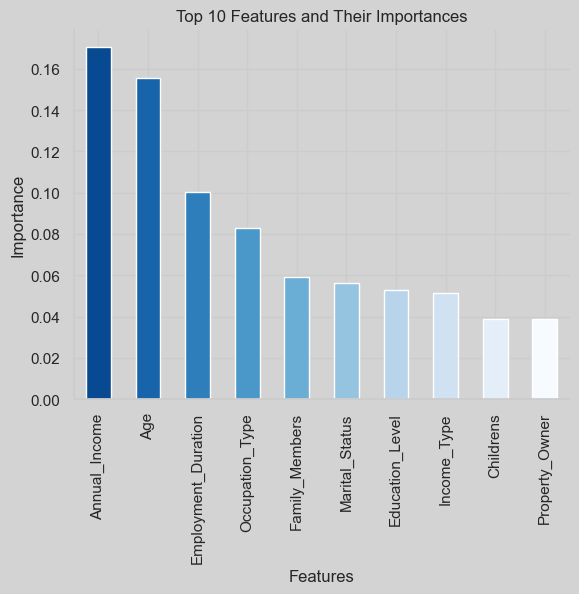

In [61]:
top_features = feature_imp.nlargest(10)

# Define a single color with varying shades (blue in this example)
base_color = 'steelblue'
num_shades = 10

# Generate shades of the base color
colors = [plt.cm.Blues(i/num_shades) for i in range(num_shades)][::-1]

# Set the background color
background_color = 'lightgray'

# Create a figure with a light gray background
fig, ax = plt.subplots()
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plot the bar chart with shaded effect
top_features.plot(kind='bar', color=colors)
plt.title('Top 10 Features and Their Importances')
plt.xlabel('Features')
plt.ylabel('Importance')

# Remove the borders around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Here Year and Month are the features which have less feature importance 


In [62]:
# Extract the top 10 important features
top_features = feature_imp.nlargest(10)

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Standardizing the values

In [63]:
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(X))

In [64]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.0,1.0,0.0,0.094891,0.0,0.75,0.25,1.0,0.638298,1.000000,0.0,0.0,0.0,0.0,1.0,0.071429
1,0.0,1.0,0.0,0.0,0.182482,1.0,0.75,0.25,1.0,0.340426,0.052632,0.0,1.0,1.0,0.0,0.0,0.071429
2,0.0,1.0,0.0,0.0,0.182482,1.0,0.75,0.25,1.0,0.340426,0.052632,0.0,1.0,1.0,0.0,0.0,0.071429
3,0.0,1.0,0.0,0.0,0.182482,1.0,0.75,0.25,1.0,0.340426,0.052632,0.0,1.0,1.0,0.0,0.0,0.071429
4,0.0,1.0,0.0,0.0,0.182482,1.0,0.75,0.25,1.0,0.340426,0.052632,0.0,1.0,1.0,0.0,0.0,0.071429


In [65]:
# Selecting only the top important features from your original dataset
X_selected = X[top_features.index]

In [66]:
X_selected.shape

(1548, 10)

# <span style="font-size: 35px; color: maroon; font-weight: bold;">Logistic Regression

In [67]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(x_train, y_train)

LogisticRegression()

In [69]:
y_pred = log_r.predict(x_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score = {accuracy * 100:.2f}%")
print()
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Accuracy Score = 90.32%

Confusion Matrix = 
 [[280   0]
 [ 30   0]]


# <span style="font-size: 35px; color: maroon; font-weight: bold;">RandomForest Classifier

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [73]:
# Initializing and training your machine learning model (Random Forest Classifier used as an example)
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
y_pred = rdf.predict(x_test)

In [75]:
y_pred[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [76]:
print(list(y_test[10:20]), end = " ")

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0] 

In [77]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score = {accuracy * 100:.2f}%")
print()
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Accuracy Score = 94.52%

Confusion Matrix = 
 [[279   1]
 [ 16  14]]


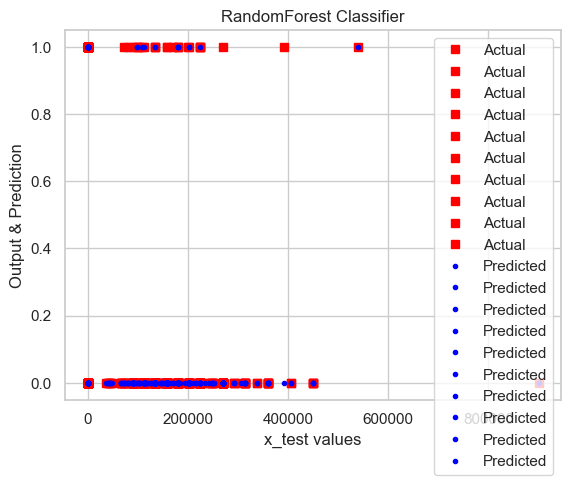

In [119]:

# Assuming x_test[19:], y_test[19:], and y_pred[19:] have the same length
plt.plot(x_test[19:], y_test[19:], "s", color="red", label="Actual")
plt.plot(x_test[19:], y_pred[19:], ".", color="blue", label="Predicted")

plt.title("RandomForest Classifier")
plt.ylabel("Output & Prediction")
plt.xlabel("x_test values")
plt.legend()
plt.show()

# <span style="font-size: 35px; color: maroon; font-weight: bold;">Decision Tree Classifier

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [80]:
# Initializing and training your machine learning model (Random Forest Classifier used as an example)
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)

DecisionTreeClassifier()

In [81]:
y_pred = dct.predict(x_test)

In [82]:
y_pred[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [83]:
print(list(y_test[10:20]), end = " ")

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0] 

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score = {accuracy * 100:.2f}%")
print()
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Accuracy Score = 88.06%

Confusion Matrix = 
 [[260  20]
 [ 17  13]]


# <span style="font-size: 35px; color: maroon; font-weight: bold;">Support vector Machines

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [87]:
# Initializing and training your machine learning model (Random Forest Classifier used as an example)
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [88]:
y_pred = svc.predict(x_test)

In [89]:
y_pred[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
print(list(y_test[10:20]), end = " ")

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0] 

In [91]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score = {accuracy * 100:.2f}%")
print()
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Accuracy Score = 90.32%

Confusion Matrix = 
 [[280   0]
 [ 30   0]]


# <span style="font-size: 35px; color: maroon; font-weight: bold;">XGBoost

In [93]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [94]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
y_pred = xgb.predict(x_test)

In [96]:
y_pred[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [97]:
print(list(y_test[10:20]), end = " ")

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0] 

In [98]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score = {accuracy * 100:.2f}%")
print()
print("Confusion Matrix = \n",confusion_matrix(y_test, y_pred))

Accuracy Score = 92.90%

Confusion Matrix = 
 [[276   4]
 [ 18  12]]


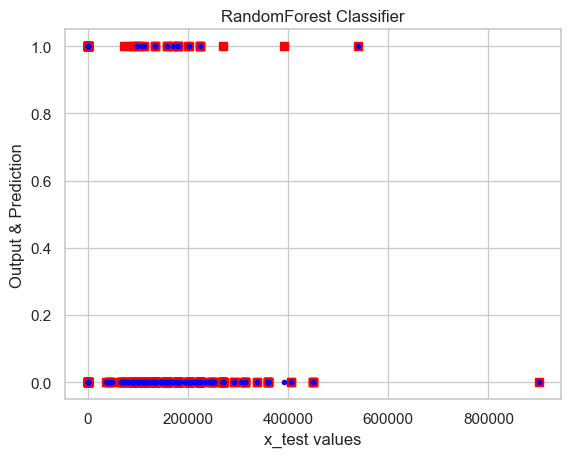

In [99]:
plt.plot(x_test, y_test, "s", color = "red")
plt.plot(x_test, y_pred, ".", color = "blue")
plt.title("RandomForest Classifier")
plt.ylabel("Output & Prediction")
plt.xlabel("x_test values")
plt.show()

# <span style="font-size: 35px; color: maroon; font-weight: bold;">Cross- Validation technique

In [100]:
from sklearn.model_selection import cross_val_score

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">RandomForest Classifier

In [101]:
cross_val_randomforest = cross_val_score(rdf, X_selected, y, scoring='accuracy', cv = 5) 

In [102]:
cross_val_randomforest

array([0.87741935, 0.87419355, 0.88387097, 0.87702265, 0.8802589 ])

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Decision Tree

In [103]:
cross_val_decisiontree = cross_val_score(dct, X_selected, y, scoring='accuracy', cv = 5) 

In [104]:
cross_val_decisiontree

array([0.82258065, 0.82903226, 0.83225806, 0.81553398, 0.81877023])

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">Logistic Regression

In [105]:
cross_val_log_r = cross_val_score(log_r, X_selected, y, scoring='accuracy', cv = 5) 

In [106]:
cross_val_log_r

array([0.88709677, 0.88709677, 0.88709677, 0.88673139, 0.88673139])

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">XGBoost

In [107]:
cross_val_xgb = cross_val_score(xgb, X_selected, y, scoring='accuracy', cv = 5) 

In [108]:
cross_val_xgb

array([0.88387097, 0.86774194, 0.87096774, 0.85760518, 0.86407767])

- Accuracy Score = 90.32% logistic
- Accuracy Score = 93.55% random forest
- Accuracy Score = 88.39% decision tree
- Accuracy Score = 90.32% SVM
- Accuracy Score = 92.90% XG Boost

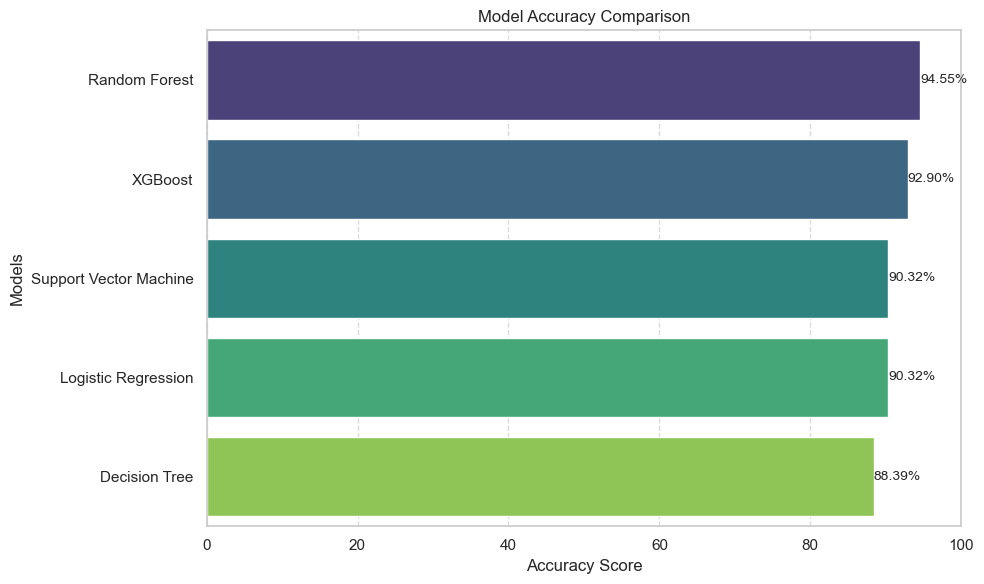

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model accuracy data
Model_accuracy = {
    "Decision Tree": {"Accuracy_score": 88.39},
    "Support Vector Machine": {"Accuracy_score": 90.32},
    "Logistic Regression": {"Accuracy_score": 90.32},
    "XGBoost": {"Accuracy_score": 92.90},
    "Random Forest": {"Accuracy_score": 94.55}
}

# Create DataFrame
Model_Accuracy = pd.DataFrame(Model_accuracy)

# Transpose DataFrame
Model_Accuracy = Model_Accuracy.transpose()

# Sort the DataFrame by Accuracy Score
Model_Accuracy = Model_Accuracy.sort_values(by='Accuracy_score', ascending=False)

# Plotting the bar graph with a colormap
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy_score', y=Model_Accuracy.index, data=Model_Accuracy, palette='viridis')
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')

# Display the actual accuracy values on each bar
for index, value in enumerate(Model_Accuracy['Accuracy_score']):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10)

plt.xlim(0, 100)  # Set the x-axis limit to ensure accuracy scores are visible
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add dashed gridlines for better readability
plt.tight_layout()
plt.show()


# <span style="font-size: 35px; color: maroon; font-weight: bold;">CONCLUSION
<span style="font-size: 18px; color: orange;">While building this credit card approval predictor model i tackled some of the pre-processing steps such as scaling, label encoding, and missing value imputation.I finished the Project with some machine learning model to predict if a person’s application for a credit card would get approved or not given some information about that person.

# <span style="font-size: 35px; color: maroon; font-weight: bold;">SQL Questions

## <span style="font-size: 25px; color: skyblue; font-weight: bold;">1. Group the customers based on their income type and find the average of their annual income.

In [110]:
import duckdb
conn=duckdb.connect()
conn.register('df',Cleaned_data_5_CCB2)
conn.execute("select income_type,avg(annual_income) as avg_income from df group by income_type order by avg_income desc").fetchdf()

,Income_Type,avg_income
0,Commercial associate,233932.602740
1,State servant,211422.413793
2,Working,180905.729323
3,Pensioner,155131.600372


## <span style="font-size: 25px; color: skyblue; font-weight: bold;">2. Find the female owners of cars and property.

In [111]:
import duckdb
conn=duckdb.connect()
conn.register('df',Cleaned_data_5_CCB2)
conn.execute("select Gender,Car_Owner,Property_Owner from df where Gender='F' AND car_owner='Y' AND Property_owner='Y' ").fetchdf()

,Gender,Car_Owner,Property_Owner
0,F,Y,Y
1,F,Y,Y
2,F,Y,Y
3,F,Y,Y
4,F,Y,Y
...,...,...,...
174,F,Y,Y
175,F,Y,Y
176,F,Y,Y
177,F,Y,Y


## <span style="font-size: 25px; color: skyblue; font-weight: bold;">3. Find the Male customers who are staying with their family.

In [112]:
import duckdb
conn=duckdb.connect()
conn.register('df',Cleaned_data_5_CCB2)
conn.execute("select Gender,housing_type from df where gender = 'M' AND (housing_type = 'With parents' or Family_Members>=2)").fetchdf()

,Gender,Housing_Type
0,M,House / apartment
1,M,House / apartment
2,M,House / apartment
3,M,With parents
4,M,House / apartment
...,...,...
473,M,With parents
474,M,With parents
475,M,With parents
476,M,With parents


## <span style="font-size: 25px; color: skyblue; font-weight: bold;">4. Please list the top five people having the highest income.

In [113]:
import duckdb
conn=duckdb.connect()
conn.register('df',Cleaned_data_5_CCB2)
conn.execute("select Individual_ID,annual_income from df order by annual_income desc limit 5").fetchdf()

,Individual_ID,Annual_Income
0,5143231,1575000.0
1,5143235,1575000.0
2,5090470,900000.0
3,5079016,900000.0
4,5079017,900000.0


## <span style="font-size: 25px; color: skyblue; font-weight: bold;">5. How many married poeple are having bad credit?

In [114]:
import duckdb
conn=duckdb.connect()
conn.register('df',Cleaned_data_5_CCB2)
conn.execute("select marital_status from df where Target_Label=1").fetchdf()

,Marital_Status
0,Married
1,Married
2,Married
3,Married
4,Married
...,...
170,Married
171,Married
172,Married
173,Married


<span style="font-size: 25px; color: skyblue; font-weight: bold;">6. What is the highest Education Level and what is the total count.

In [115]:
import duckdb
conn=duckdb.connect()
conn.register('df',Cleaned_data_5_CCB2)
conn.execute("select education_level,count(education_level) as high_edu from df group by education_level order by high_edu desc").fetchdf()

,Education_Level,high_edu
0,Secondary / secondary special,1031
1,Higher education,426
2,Incomplete higher,68
3,Lower secondary,21
4,Academic degree,2


## <span style="font-size: 25px; color: skyblue; font-weight: bold;">7. Between married males and females ,who is having more bad credit?

In [116]:
import duckdb
conn=duckdb.connect()
conn.register('df',Cleaned_data_5_CCB2)
conn.execute("SELECT Gender, Target_label, COUNT(Target_label) as Number_of_bad_credits FROM df WHERE Target_label = 1 GROUP BY Gender, Target_label ORDER BY Number_of_bad_credits DESC limit 1").fetchdf()

,Gender,Target_Label,Number_of_bad_credits
0,F,1,100
